# Análisis de vivienda deshabitada

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import osmnx as ox
from scipy.stats import gaussian_kde
from pandas.api.types import CategoricalDtype

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import os
import sys
module_path = os.path.abspath(os.path.join('../../'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/home/vscode/anaconda3/envs/odc/lib/python3.10/site-packages/osmnx/utils.py:192: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  warnings.warn(


## Descarga de datos por ciudad

In [2]:
city = 'Monterrey'
res = 8

In [3]:
censo_folder = f'censo_block_10_20_hexres{res}'
query = f'SELECT * FROM censo.{censo_folder} WHERE \"city\" LIKE \'{city}\''
gdf = aup.gdf_from_query(query, geometry_col='geometry')
print(gdf.shape)
gdf.head(2)

(1490, 433)


,hex_id_8,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,p_3ymas_f,p_3ymas_m,...,R_VivHab_20,R_VivDes_20,Z_RVivHab_20,R_VivHab_10,Z_RVivHab_10,Chng_RVivHab_10,DensPob_10_20,R_TVivDes_10_20,geometry,city
0,8848a205b1fffff,10619.0,5338.0,5281.0,447.0,156.0,187.0,10127.0,5100.0,5027.0,...,0.898835,0.059779,0.660828,0.0,None,0.898835,41.426663,None,"POLYGON ((-100.33358 25.79790, -100.32883 25.8...",Monterrey
1,8848a21105fffff,304.0,136.0,156.0,4.0,0.0,3.0,129.0,52.0,75.0,...,0.793388,0.049587,0.158093,0.0,None,0.793388,2.413829,None,"POLYGON ((-100.16099 25.45600, -100.15625 25.4...",Monterrey


In [4]:
censo_folder = f'censo_10_20_hexres{res}'
query = f'SELECT * FROM censo.{censo_folder} WHERE \"city\" LIKE \'{city}\''
gdf_ageb = aup.gdf_from_query(query, geometry_col='geometry')
print(gdf.shape)
gdf_ageb.head(2)

(1490, 433)


,hex_id_8,pobtot,pobfem,pobmas,p_0a2,p_0a2_f,p_0a2_m,p_3ymas,p_3ymas_f,p_3ymas_m,...,R_VivHab_20,R_VivDes_20,Z_RVivHab_20,R_VivHab_10,Z_RVivHab_10,Chng_RVivHab_10,DensPob_10_20,R_TVivDes_10_20,geometry,city
0,8848a205b1fffff,10619.0,5338.0,5281.0,447.0,156.0,187.0,10127.0,5100.0,5027.0,...,0.898835,0.059779,0.660828,0.0,None,0.898835,41.426663,None,"POLYGON ((-100.33358 25.79790, -100.32883 25.8...",Monterrey
1,8848a21105fffff,304.0,136.0,156.0,4.0,0.0,3.0,129.0,52.0,75.0,...,0.793388,0.049587,0.158093,0.0,None,0.793388,2.413829,None,"POLYGON ((-100.16099 25.45600, -100.15625 25.4...",Monterrey


<AxesSubplot:>

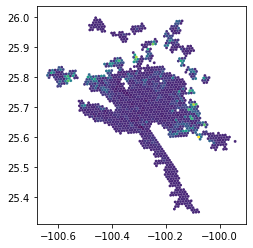

In [5]:
gdf.plot('T_Viv_10_20')

## EDA

Análisis de datos estadísticos

In [6]:
cambio_vivienda_total = gdf.T_Viv_10_20.sum()
cambio_poblacion_total = gdf.T_Pob_10_20.sum()
vivienda_deshabitada_20 = gdf.vivpar_des.sum()
promedio_ocupantes = gdf.prom_ocup.mean()
relacion_cambio_pob_viv = gdf.T_Pob_10_20.sum()/gdf.T_Viv_10_20.sum()
promedio_cambio_viv = gdf.T_Viv_10_20.mean()
mediana_cambio_viv = gdf.T_Viv_10_20.median()
desvest_cambio_viv = gdf.T_Viv_10_20.std()
min_cambio_viv = gdf.T_Viv_10_20.min()
max_cambio_viv = gdf.T_Viv_10_20.max()

In [7]:
print(f'Cambio de vivienda total del 2010 al 2020: {cambio_vivienda_total}')

Cambio de vivienda total del 2010 al 2020: 474532.0


In [8]:
print(f'Cambio de población total del 2010 al 2020: {cambio_poblacion_total}')

Cambio de población total del 2010 al 2020: 1113615.0


In [9]:
print(f'Vivienda deshabitada en 2020: {vivienda_deshabitada_20}')

Vivienda deshabitada en 2020: 198931.0


In [10]:
print(f'Promedio de ocupantes por vivienda en 2020: {promedio_ocupantes}')

Promedio de ocupantes por vivienda en 2020: 3.164098477248841


In [11]:
print(f'Relación entre el cambio de población y de vivienda del 2010 al 2020: {relacion_cambio_pob_viv} per/viv')

Relación entre el cambio de población y de vivienda del 2010 al 2020: 2.3467648124889364 per/viv


In [12]:
print(f'Promedio de cambio de viviendas por hexágono del 2010 al 2020: {promedio_cambio_viv} viviendas')

Promedio de cambio de viviendas por hexágono del 2010 al 2020: 318.4778523489933 viviendas


In [13]:
print(f'Mediana de cambio de viviendas por hexágono del 2010 al 2020: {mediana_cambio_viv} viviendas')

Mediana de cambio de viviendas por hexágono del 2010 al 2020: 50.0 viviendas


In [14]:
print(f'Desviación estándar de cambio de viviendas por hexágono del 2010 al 2020: {desvest_cambio_viv} viviendas')

Desviación estándar de cambio de viviendas por hexágono del 2010 al 2020: 676.4305964095535 viviendas


In [15]:
print(f'Valor mínimo de cambio de vivienda por hexágono del 2010 al 2020: {min_cambio_viv} viviendas')

Valor mínimo de cambio de vivienda por hexágono del 2010 al 2020: -736.0 viviendas


In [16]:
print(f'Valor máximo de cambio de vivienda por hexágono del 2010 al 2020: {max_cambio_viv} viviendas')

Valor máximo de cambio de vivienda por hexágono del 2010 al 2020: 6062.0 viviendas


Distribución de datos de cambio de viviendas por hexágono

Text(0.5, 6.79999999999999, 'Cambio de vivienda')

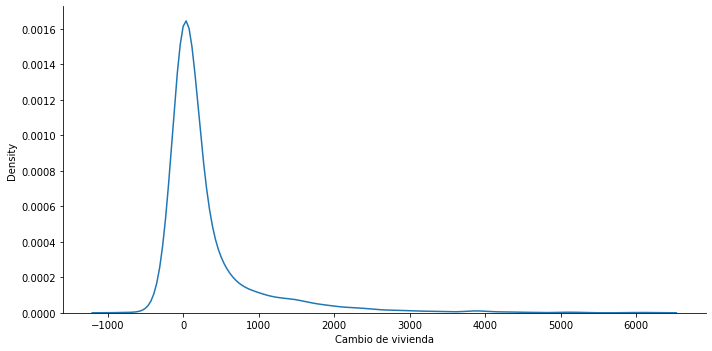

In [17]:
g = sns.displot(data=gdf, x="T_Viv_10_20", kind="kde",
           height=5, aspect=2)
plt.xlabel('Cambio de vivienda')

Text(0.5, 0, 'Cambio de vivienda')

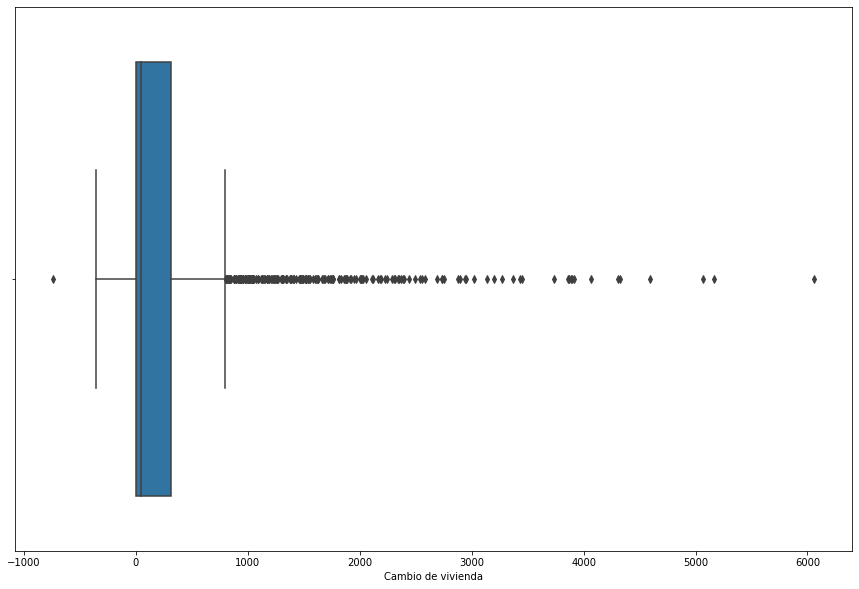

In [18]:
fig, ax = plt.subplots(figsize=(15,10))

# x = np.array(gdf_sq['Metros cuadrados de construcción'])
y = np.array(gdf['T_Viv_10_20'])

sns.boxplot(x=y, ax=ax)

plt.xlabel('Cambio de vivienda')

## Change analysis

### New households

Análisis de zonas que no contaban con vivienda en el 2010 y ahora cuentan con vivienda.

<AxesSubplot:>

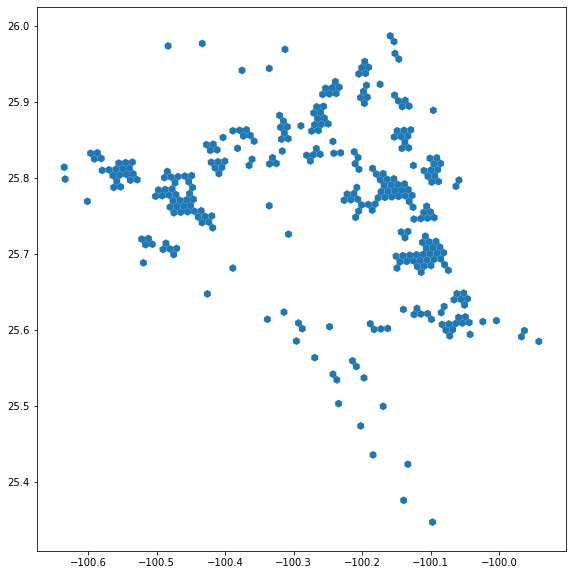

In [19]:
fig, ax = plt.subplots(figsize=(20,10))

gdf[gdf['10_vivtot']==0].plot(ax=ax) #### COMPARTIR

Viviendas nuevas en áreas que no contaban con vivienda en el 2010.

In [20]:
gdf[gdf['10_vivtot']==0]['vivtot'].sum()

234131.0

In [21]:
pct_new_house = gdf[gdf['10_vivtot']==0]['vivtot'].sum() / gdf.T_Viv_10_20.sum()
print(f'Porcentaje de viviendas nuevas en sitios donde no había vivienda en 2010: {round(pct_new_house*100, 2)}')

Porcentaje de viviendas nuevas en sitios donde no había vivienda en 2010: 49.34


In [22]:
vivpar_new = gdf[gdf['10_vivtot']==0]['tvivparhab'].sum()
print(f'Viviendas particulaes en sitios donde no había vivienda en 2010: {vivpar_new} viviendas particulares')

Viviendas particulaes en sitios donde no había vivienda en 2010: 167116.0 viviendas particulares


In [23]:
pobtot_new = gdf[gdf['10_vivtot']==0]['pobtot'].sum()
print(f'Población total en sitios donde no había vivienda en 2010: {vivpar_new} personas')

Población total en sitios donde no había vivienda en 2010: 167116.0 personas


In [24]:
rel_pob_viv_new = gdf[gdf['10_vivtot']==0]['pobtot'].sum() / gdf[gdf['10_vivtot']==0]['tvivparhab'].sum()
print(f'Relación de población vs vivienda en sitios donde no había vivienda en 2010: {rel_pob_viv_new} per/viv')

Relación de población vs vivienda en sitios donde no había vivienda en 2010: 3.3631669020321215 per/viv


In [25]:
pct_new_people = gdf[gdf['10_vivtot']==0]['pobtot'].sum() / gdf.T_Pob_10_20.sum()
print(f'Porcentaje de poblacion nuevas en sitios donde no había nada {round(pct_new_people*100, 2)}')

Porcentaje de poblacion nuevas en sitios donde no había nada 50.47


In [26]:
por_vivpar_new = gdf[gdf['10_vivtot']==0]['tvivparhab'].sum() / gdf[gdf['10_vivtot']==0]['vivtot'].sum()
print(f'Porcentaje de viviendas particulares del total de viviendas en zonas que no había vivienda en 2010: {round(pct_new_people*100,2)}')

Porcentaje de viviendas particulares del total de viviendas en zonas que no había vivienda en 2010: 50.47


### Existing households

Análisis de zonas que contaban con vivienda en 2010.

In [27]:
avg_hab = gdf[gdf['10_vivtot']>0]['tvivparhab'].sum() / gdf[gdf['10_vivtot']>0]['vivtot'].sum()
print(f'Promedio de viviendas ocupadas {round(avg_hab,4) * 100}')

Promedio de viviendas ocupadas 85.48


Visualización de sitios que cuentan con un cambio de vivienda mayor al de la mediana (50 viviendas nuevas por hexágono)

<AxesSubplot:>

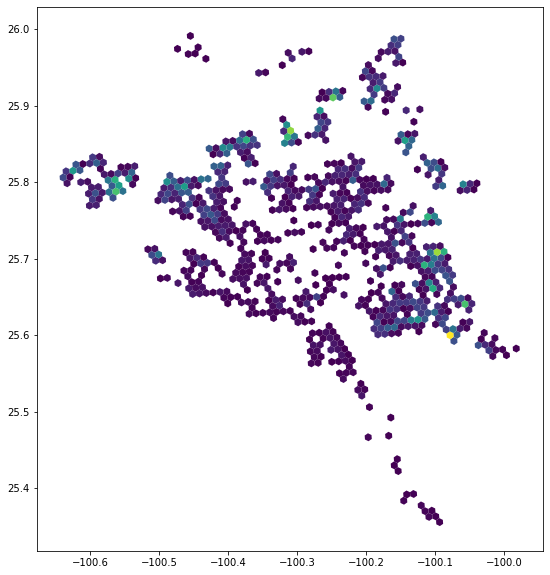

In [28]:
fig, ax = plt.subplots(figsize=(20,10))

gdf.loc[gdf.T_Viv_10_20>=gdf.T_Viv_10_20.median()].plot('T_Viv_10_20', ax=ax)

Visualización del cambio de vivienda del 2010 al 2020 en zonas que contaban con vivendas en 2010, pero debajo de la mediana.

<AxesSubplot:>

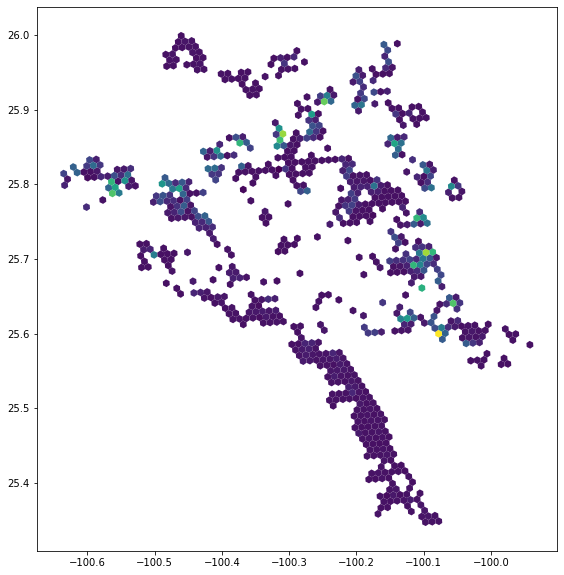

In [29]:
fig, ax = plt.subplots(figsize=(20,10))

gdf.loc[(gdf['10_vivtot']<gdf['10_vivtot'].median())].plot('T_Viv_10_20', ax=ax)

Visualización del cambio de vivienda del 2010 al 2020 en zonas que contaban con vivendas en 2010, pero debajo de la mediana y que cuentan con un cambio de vivienda mayor al de la mediana.

<AxesSubplot:>

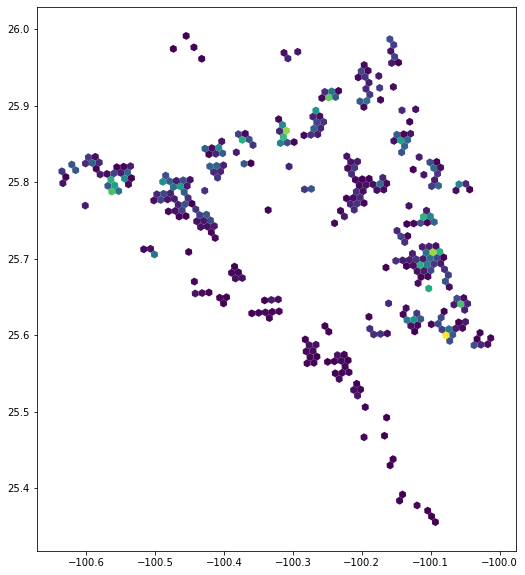

In [30]:
fig, ax = plt.subplots(figsize=(20,10))

gdf.loc[(gdf['10_vivtot']<gdf['10_vivtot'].median())&
    (gdf.T_Viv_10_20>=gdf.T_Viv_10_20.median())].plot('T_Viv_10_20', ax=ax)

Visualización del cambio de vivienda del 2010 al 2020 en zonas que contaban con vivienda en el 2010 y tuvieron un crecimiento de viviendas totales.

<AxesSubplot:>

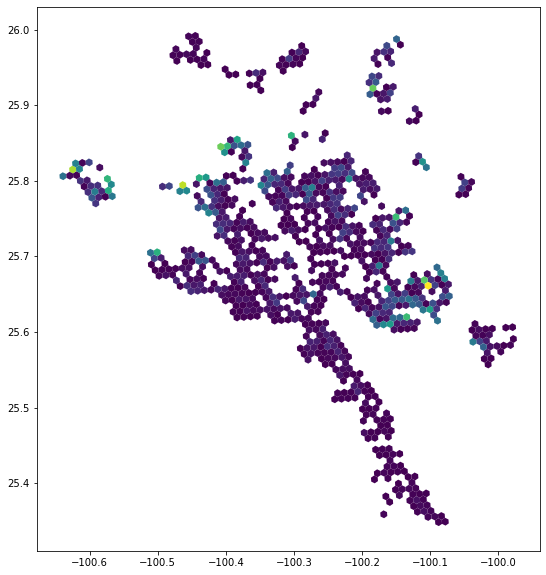

In [31]:
fig, ax = plt.subplots(figsize=(20,10))

gdf.loc[(gdf['10_vivtot']>0)&(gdf.T_Viv_10_20>0)].plot('T_Viv_10_20', ax=ax)

Visualización del cambio de vivienda del 2010 al 2020 en zonas que contaban con vivienda en el 2010 y tuvieron un crecimiento de viviendas totales mayor al de la mediana.

<AxesSubplot:>

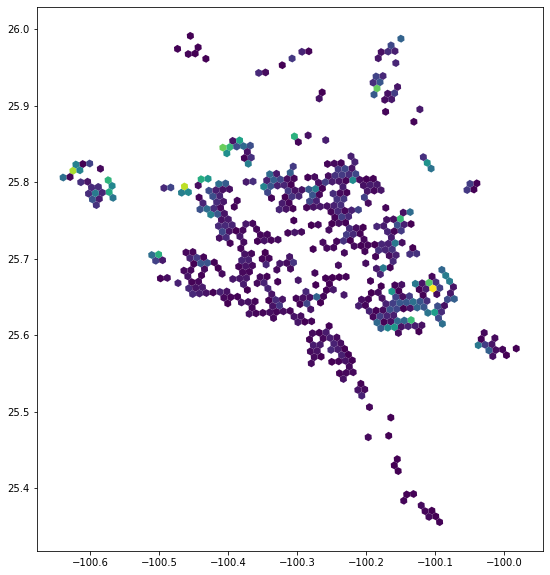

In [32]:
fig, ax = plt.subplots(figsize=(20,10))

gdf.loc[(gdf['10_vivtot']>0)&(gdf.T_Viv_10_20>=gdf.T_Viv_10_20.median())].plot('T_Viv_10_20', ax=ax)

Visualización de polígonos que perdieron viviendas del 2010 al 2020.

<AxesSubplot:>

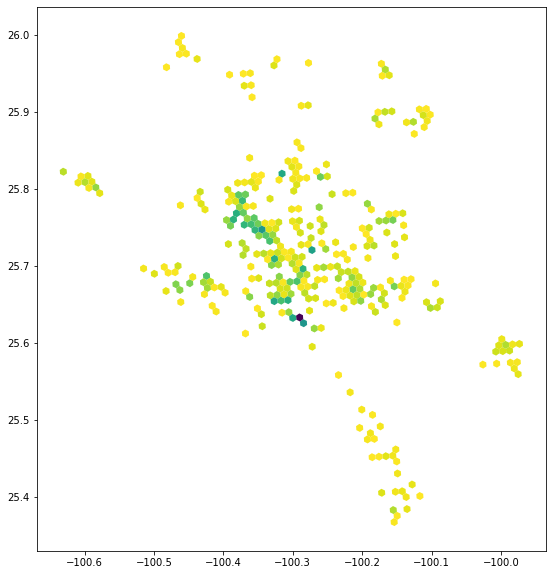

In [33]:
fig, ax = plt.subplots(figsize=(20,10))

gdf[gdf.T_Viv_10_20<0].plot('T_Viv_10_20', ax=ax)

Suma del cambio de personas en hexágonos que perdieron viviendas del 2010 al 2020.

In [34]:
gdf[gdf.T_Viv_10_20<0]['T_Pob_10_20'].sum()

-146875.0

Total de población que se perdió del 2010 al 2020.

In [35]:
gdf[gdf.T_Pob_10_20<0]['T_Pob_10_20'].sum()

-258594.0

Visualización de los hexágonos donde se perdió población del 2010 al 2020.

<AxesSubplot:>

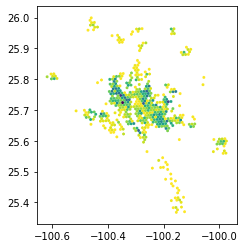

In [36]:
gdf[gdf.T_Pob_10_20<0].plot('T_Pob_10_20')

<AxesSubplot:>

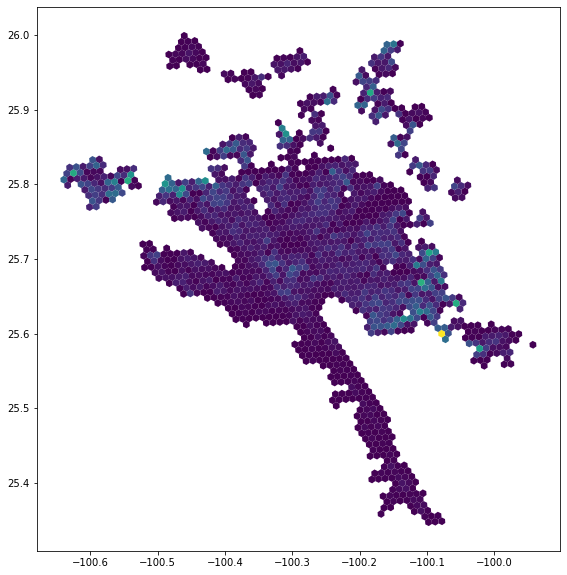

In [37]:
fig, ax = plt.subplots(figsize=(20,10))

gdf.plot('vivpar_des', ax=ax)

## Household vs mass public transport

In [38]:
grl_dir = '/workspaces/accesibilidad-urbana/data/processed/pop_change/'
hex_tp = gpd.read_file(grl_dir+f'{city}_HexRes{res}_MassPublicTransport.geojson', driver='GeoJSON')
print(hex_tp.shape)
hex_tp.head(2)

(3807, 20)


,idx_accessibility,idx_hospitales,idx_supermercado,idx_farmacias,node_count,wAcc,wHsp,wSpm,wFrm,idx_accessibility_wavg,idx_hospitales_wavg,idx_supermercado_wavg,idx_farmacias_wavg,hex_id_8,CVEGEO,dist_farmacia,dist_hospitales,dist_supermercados,time_paradas_transporte,geometry
0,1.711254e-07,5.137917e-07,9.834111e-11,1.438756e-15,1,1.711254e-07,5.137917e-07,9.834111e-11,1.438756e-15,8.104983e-13,2.433463e-12,4.657714e-16,6.814356e-21,8848a22169fffff,19001,6093.8030,16181.609000,4320.4980,429.541841,"POLYGON ((-100.41315 25.97324, -100.41271 25.9..."
1,1.213268e-07,2.810359e-07,8.171950e-08,1.584510e-09,6,7.279607e-07,1.686215e-06,4.903170e-07,9.507062e-09,3.447828e-12,7.986395e-12,2.322280e-12,4.502814e-14,8848a22321fffff,19001,4148.9265,16763.191333,3262.2445,415.818870,"POLYGON ((-100.43044 25.94069, -100.42568 25.9..."


In [39]:
if city == 'Guadalajara':
    hex_tp = hex_tp.rename(columns={'time_transporte_masivo_V2':'time_paradas_transporte'})

In [40]:
hex_tp = hex_tp[[f'hex_id_{res}','time_paradas_transporte']].copy()
gdf_filter = gdf[[f'hex_id_{res}','10_vivtot','T_Pob_10_20','vivpar_des',
                  'pobtot','10_prom_ocup','prom_ocup','10_pobtot','tvivparhab',
                   'vivtot','T_Viv_10_20','R_VivDes_20','geometry']].copy()

In [41]:
gdf_filter['pct_vivpardes'] = gdf_filter['vivpar_des'] / gdf_filter['vivtot']

<AxesSubplot:>

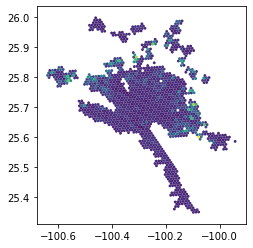

In [42]:
hex_merge = gdf_filter.merge(hex_tp, on='hex_id_8')
hex_merge.plot('T_Viv_10_20')

In [43]:
time_analysis = [0, 10, 20, 30, 60, 120, 180, 270, 10000]
hex_merge['time_group'] = np.nan

for i in range(1,len(time_analysis)):
    min_time = time_analysis[i-1]
    max_time = time_analysis[i]
    hex_merge.loc[(hex_merge.time_paradas_transporte>min_time)&
                 (hex_merge.time_paradas_transporte<=max_time), 'time_group'] = f'{time_analysis[i]}_min'

In [44]:
hex_agg = hex_merge[['time_group','T_Viv_10_20','T_Pob_10_20',
                     'vivpar_des','pct_vivpardes','10_prom_ocup','prom_ocup']].groupby('time_group').agg(['mean','median','std','sum'])
hex_agg.columns = hex_agg.columns.map('_'.join).str.strip('_')
hex_agg.sort_values('T_Viv_10_20_median')

,T_Viv_10_20_mean,T_Viv_10_20_median,T_Viv_10_20_std,T_Viv_10_20_sum,T_Pob_10_20_mean,T_Pob_10_20_median,T_Pob_10_20_std,T_Pob_10_20_sum,vivpar_des_mean,vivpar_des_median,...,pct_vivpardes_std,pct_vivpardes_sum,10_prom_ocup_mean,10_prom_ocup_median,10_prom_ocup_std,10_prom_ocup_sum,prom_ocup_mean,prom_ocup_median,prom_ocup_std,prom_ocup_sum
time_group,,,,,,,,,,,,,,,,,,,,,
10_min,24.897959,0.0,140.720504,1220.0,-323.040816,-421.0,596.536809,-15829.0,163.734694,137.0,...,0.062319,5.662599,0.0,0.0,0.0,0.0,3.080767,3.105459,0.376830,150.957594
20_min,49.558824,15.5,188.135104,3370.0,-356.955882,-442.5,939.743462,-24273.0,145.941176,128.0,...,0.035269,5.273124,0.0,0.0,0.0,0.0,3.282997,3.270098,0.533737,223.243824
10000_min,316.575377,22.0,732.850522,125997.0,866.165829,57.0,2009.701274,344734.0,117.319095,31.0,...,0.117040,52.010819,0.0,0.0,0.0,0.0,3.104986,3.330509,0.951887,1235.784361
30_min,86.805556,25.0,282.318651,6250.0,-170.291667,-230.0,1245.969665,-12261.0,140.916667,128.5,...,0.039490,5.420385,0.0,0.0,0.0,0.0,3.290308,3.331669,0.720006,236.902185
60_min,203.659864,53.0,362.801136,29938.0,241.748299,-2.0,1403.787576,35537.0,131.020408,115.0,...,0.048211,11.165088,0.0,0.0,0.0,0.0,3.427993,3.461554,0.577125,503.914988
120_min,287.900344,85.0,563.269404,83779.0,595.680412,88.0,1691.586702,173343.0,123.790378,94.0,...,0.082248,27.272950,0.0,0.0,0.0,0.0,3.268892,3.509851,0.952059,951.247674
180_min,459.648305,104.5,829.841717,108477.0,1286.919492,287.0,2379.753919,303713.0,154.436441,68.0,...,0.098294,25.774106,0.0,0.0,0.0,0.0,3.030075,3.452651,1.271326,715.097770
270_min,513.745536,150.5,839.669657,115079.0,1358.013393,405.0,2304.381970,304195.0,144.366071,54.0,...,0.121048,27.455574,0.0,0.0,0.0,0.0,3.049036,3.474171,1.273216,682.984044


In [45]:
hex_agg['vivpar_des_sum'].sum()

198854.0

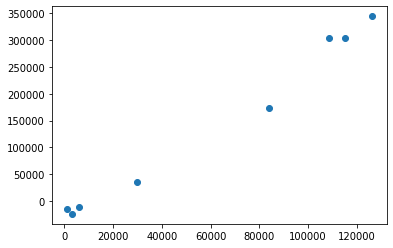

In [46]:
plt.scatter(x=hex_agg.T_Viv_10_20_sum,
           y=hex_agg.T_Pob_10_20_sum)

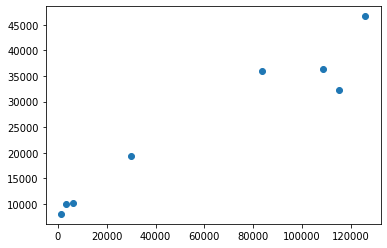

In [47]:
plt.scatter(x=hex_agg.T_Viv_10_20_sum,
           y=hex_agg.vivpar_des_sum)

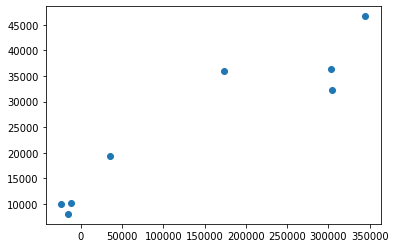

In [48]:
plt.scatter(x=hex_agg.T_Pob_10_20_sum,
           y=hex_agg.vivpar_des_sum)

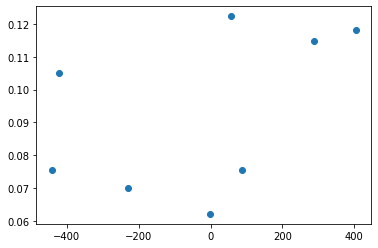

In [49]:
plt.scatter(x=hex_agg.T_Pob_10_20_median,
           y=hex_agg.pct_vivpardes_median)

In [50]:
hex_pdf = gpd.GeoDataFrame()
sample_size = 40

for t in list(hex_merge.time_group.unique()):
    if t == f'{time_analysis[-1]}_min':
        continue
    else:
        hex_tmp = hex_merge.loc[hex_merge.time_group==t].sample(sample_size).copy()
        hex_pdf = pd.concat([hex_pdf, hex_tmp], ignore_index = True, axis = 0)

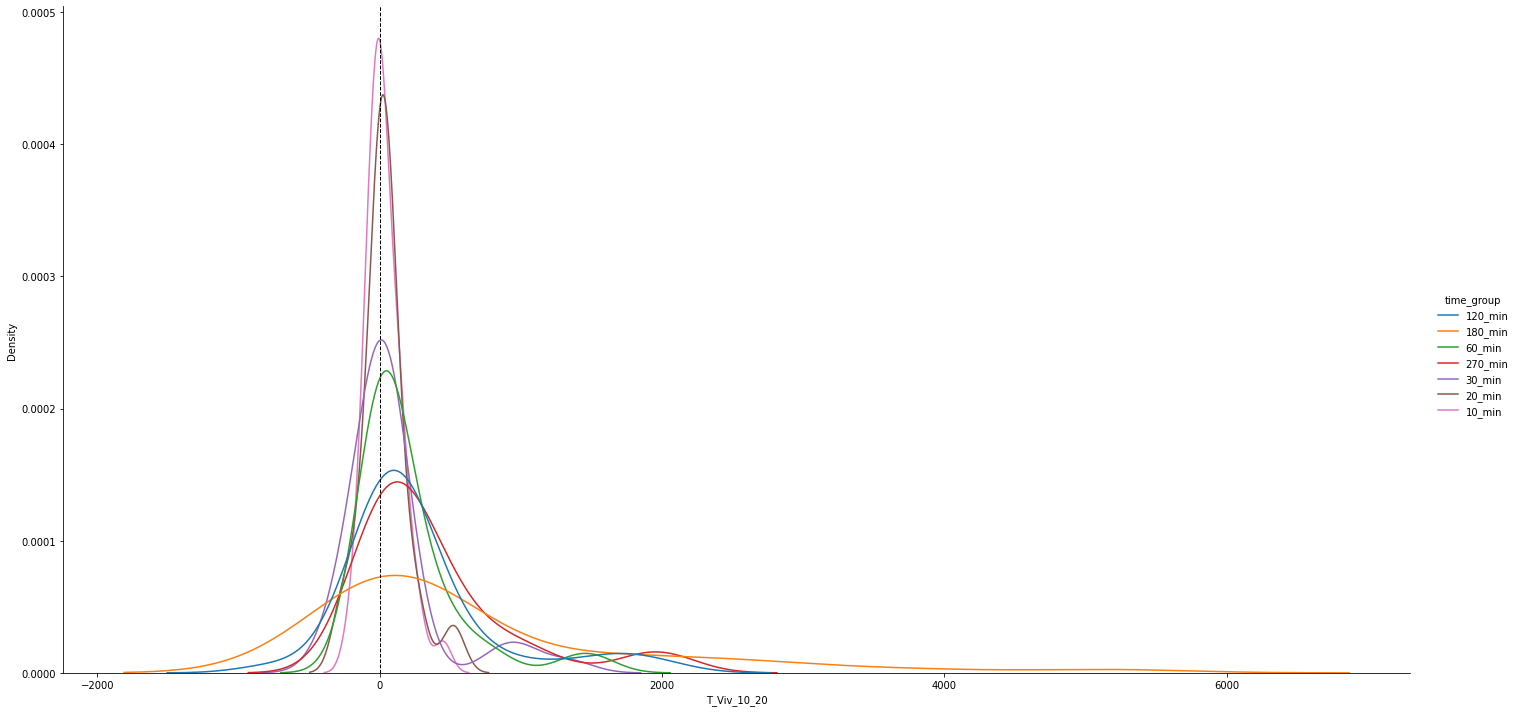

In [51]:
g = sns.displot(data=hex_pdf, x="T_Viv_10_20", hue="time_group", kind="kde",
           height=10, aspect=2)
g.refline(x = 0,
          color = "black",
         lw = 1)

In [52]:
from pandas.api.types import CategoricalDtype

In [53]:
hex_boxplot = hex_pdf.copy()
#categorical data
cat_list = [f'{t}_min' for t in time_analysis]

cat_size_order = CategoricalDtype(
    cat_list, 
    ordered=True)

hex_boxplot['time_group'] = hex_boxplot['time_group'].astype(cat_size_order)
hex_boxplot = hex_boxplot.sort_values('time_group')

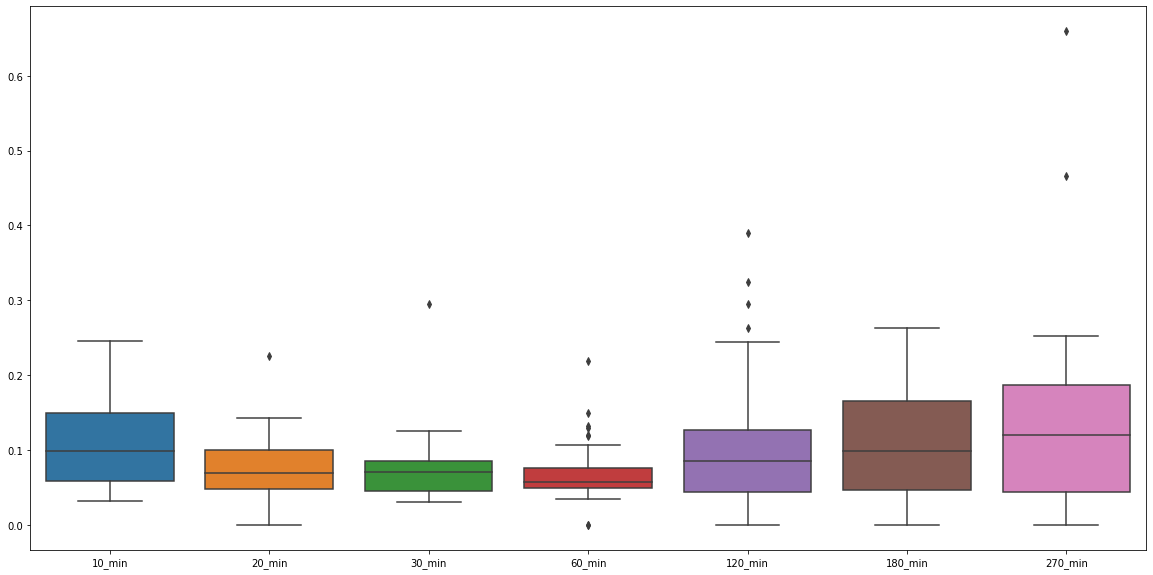

In [54]:
fig, ax = plt.subplots(figsize=(20,10))

g = sns.boxplot(x=np.array(hex_boxplot.time_group) , y=np.array(hex_boxplot.pct_vivpardes), ax=ax)


## 15 minute analysis

In [55]:
method = 'MeanTime'
grl_dir = '/workspaces/accesibilidad-urbana/data/processed/15_min_city/'
hex_mean_res8 = gpd.read_file(grl_dir+f'HexRes{res}_{city}_15minAnalisis_v{method}.geojson', driver='GeoJSON')
print(hex_mean_res8.shape)
hex_mean_res8.head(2)

(8846, 66)


,hex_id_8,sip_centro_admin,denue_preescolar,denue_primaria,denue_secundaria,denue_escuela_mixta,denue_casa_adultos_mayores,denue_guarderias,denue_dif,denue_biblioteca,...,Farmacias,Hogar,Complementarios,Comercio,Social,Actividad física,Cultural,Entretenimiento,15_min_analysis,geometry
0,8848a21553fffff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-100.34357 25.55646, -100.34400 25.5..."
1,8848a22de5fffff,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"POLYGON ((-100.41149 26.19317, -100.40672 26.1..."


In [56]:
tiempo_limite = 15

In [57]:
hex_mean_res8 = hex_mean_res8[['hex_id_8','15_min_analysis']]

In [58]:
hex_analysis = hex_merge.merge(hex_mean_res8, on='hex_id_8')

In [59]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Pob_10_20.sum()

-5693.0

In [60]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite,'hex_id_8'].count() / hex_analysis['hex_id_8'].count()

0.010101010101010102

In [61]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite,'hex_id_8'].count() / hex_analysis['hex_id_8'].count()

0.010101010101010102

In [62]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Viv_10_20.sum()

-795.0

In [63]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivtot.sum()

22625.0

In [64]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivtot.sum() * hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].prom_ocup.mean() 

60196.99925663385

In [65]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivtot.sum() * 0.95 * hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].prom_ocup.mean() 

57187.149293802155

In [66]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].pobtot.sum()

56140.0

In [67]:
100 * hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].pobtot.sum() / hex_analysis.pobtot.sum()

1.067932409427861

In [68]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivtot.sum() * hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].prom_ocup.mean() - hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].pobtot.sum() 

4056.999256633848

In [69]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivpar_des.sum()

3186.0

In [70]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivtot.sum() - hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].tvivparhab.sum()

4456.0

In [71]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivtot.sum()

22625.0

In [72]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].pobtot.sum()

56140.0

In [73]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].tvivparhab.sum() / hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivtot.sum()

0.8030497237569061

In [74]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].prom_ocup.mean() 

2.660640851121938

In [75]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivpar_des.sum() / hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivtot.sum()

0.14081767955801106

In [76]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].R_VivDes_20.mean()

0.14032554699865604

In [77]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Pob_10_20.sum() / hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Viv_10_20.sum()

7.161006289308176

In [78]:
hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].T_Pob_10_20.sum()

1114852.0

In [79]:
hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].T_Viv_10_20.sum()

474905.0

In [80]:
hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].vivpar_des.sum()

195668.0

In [81]:
hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].vivtot.sum()

1764534.0

In [82]:
hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].vivpar_des.sum() / hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].vivtot.sum()

0.1108893339544605

In [83]:
hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].tvivparhab.sum() / hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].vivtot.sum()

0.8367461324066298

In [84]:
hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].R_VivDes_20.mean()

0.1131302012104738

In [85]:
hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].T_Pob_10_20.sum() / hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].T_Viv_10_20.sum()

2.347526347374738

In [86]:
hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].T_Viv_10_20.sum() / hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].vivtot.sum()

0.26913904747655754

In [87]:
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Viv_10_20.sum() / hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivtot.sum()

-0.035138121546961325

<AxesSubplot:>

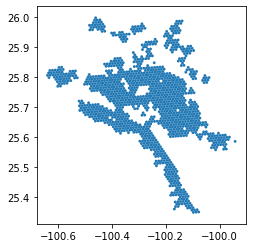

In [88]:
hex_analysis.loc[hex_analysis['15_min_analysis']>20].plot()

In [89]:
gdf['10_prom_ocup'].sum()

0.0

In [90]:
hex_analysis.columns.to_list()

['hex_id_8',
 '10_vivtot',
 'T_Pob_10_20',
 'vivpar_des',
 'pobtot',
 '10_prom_ocup',
 'prom_ocup',
 '10_pobtot',
 'tvivparhab',
 'vivtot',
 'T_Viv_10_20',
 'R_VivDes_20',
 'geometry',
 'pct_vivpardes',
 'time_paradas_transporte',
 'time_group',
 '15_min_analysis']

<AxesSubplot:>

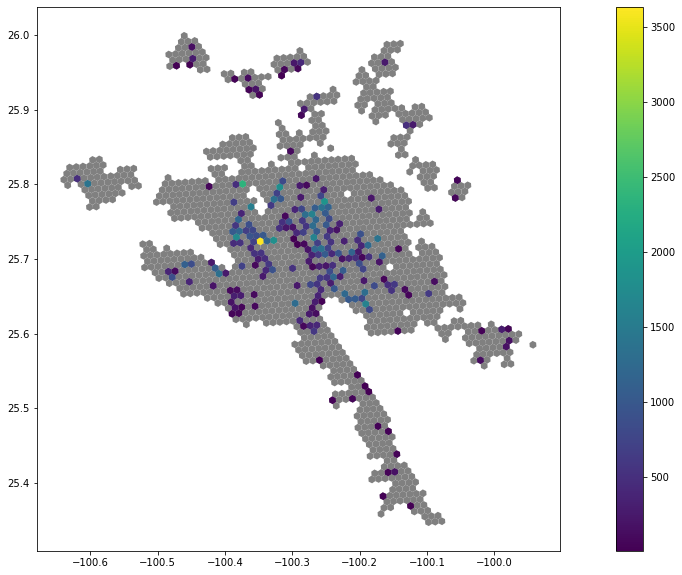

In [91]:
fig, ax = plt.subplots(figsize=(20,10))
hex_analysis.loc[(hex_analysis.T_Viv_10_20>0)&
                (hex_analysis.T_Pob_10_20<0),'loss_relation'] = (hex_analysis.T_Pob_10_20*-1) + (2.5 * hex_analysis.T_Viv_10_20)

hex_analysis.loc[(hex_analysis.T_Viv_10_20>0)&
                (hex_analysis.T_Pob_10_20<0),'log_loss_relation'] = np.log(hex_analysis.loc[(hex_analysis.T_Viv_10_20>0)&
                                                                                            (hex_analysis.T_Pob_10_20<0),'loss_relation'])

hex_analysis.loc[(hex_analysis.T_Viv_10_20>0)&
                (hex_analysis.T_Pob_10_20<0)].plot('loss_relation', legend=True, ax=ax)

gdf.plot(ax=ax, color='grey', zorder=-1)

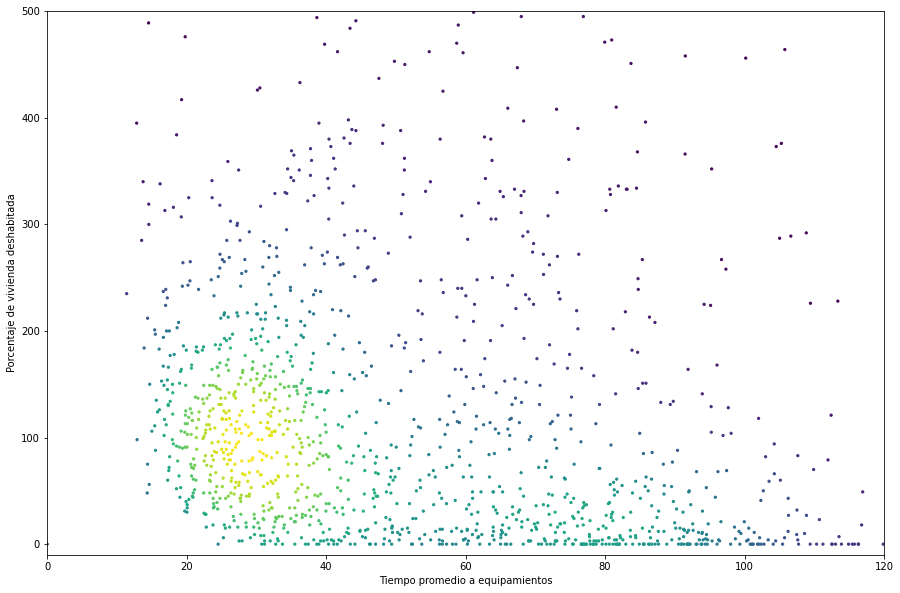

In [92]:
fig, ax = plt.subplots(figsize=(15,10))

idx = hex_analysis.pct_vivpardes.isnull()
hex_scatter = hex_analysis[~idx].copy()

x = np.array(hex_scatter['15_min_analysis'])
y = np.array(hex_scatter['vivpar_des'])
# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

ax.scatter(x, y, c=z, s=5, cmap='viridis')

plt.xlabel('Tiempo promedio a equipamientos')
plt.ylabel('Porcentaje de vivienda deshabitada')

ax.set_xlim(0,120)
ax.set_ylim(-10,500)

plt.show()

In [93]:
# x = np.array(hex_corr.imn_2020).reshape((1,-1))
# y = np.array(hex_corr.idx_accessibility).reshape((1,-1))
np.corrcoef(x, y)

array([[ 1.        , -0.05738291],
       [-0.05738291,  1.        ]])

## Elementos de salida

In [94]:
hex_analysis['10_pobtot'].sum()

4147728.0

In [95]:
datos_estadisticos = {
    'viv_tot_2010' : hex_analysis['10_vivtot'].sum(),
    'viv_tot_2020' : hex_analysis['vivtot'].sum(),
    'cambio_vivtot_10_20' : hex_analysis['T_Viv_10_20'].sum(),
    '%_viv_nueva_10_20' : round(100 * hex_analysis['T_Viv_10_20'].sum() / hex_analysis['10_vivtot'].sum(),2),
    'pob_tot_2010' : hex_analysis['10_pobtot'].sum(),
    'pob_tot_2020' : hex_analysis['pobtot'].sum(),
    'cambio_pobtot_10_20' : hex_analysis['T_Pob_10_20'].sum(),
    '%_pob_nueva_10_20' : round(100*hex_analysis['T_Pob_10_20'].sum() / hex_analysis['10_pobtot'].sum(),2),
    'pob_nueva-viv_nueva' : round(hex_analysis['T_Pob_10_20'].sum() / hex_analysis['T_Viv_10_20'].sum(),2),
    'prom_ocup_10' : 3.49,
    'prom_ocup_20' : round(hex_analysis['prom_ocup'].mean(),2),
    'viv20_sin_viv10' : gdf[gdf['10_vivtot']==0]['vivtot'].sum(),
    '%viv20_sinviv10_cambio_vivtot_10_20' : round(100*gdf[gdf['10_vivtot']==0]['vivtot'].sum() / hex_analysis['T_Viv_10_20'].sum(),2),
    'pob20_sin_viv10' : gdf[gdf['10_vivtot']==0]['pobtot'].sum(),
    '%pob20_sinviv10_cambio_pobtot_10_20' : round(100*gdf[gdf['10_vivtot']==0]['pobtot'].sum() / hex_analysis['T_Pob_10_20'].sum(),2),
    'cambio_pobtot_10_20_zona_consolidada' : hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Pob_10_20.sum(),
    'cambio_vivtot_10_20_zona_consolidada' : hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Viv_10_20.sum(),
    'cambio_pobtot_10_20_zona_no_consolidada' : hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].T_Pob_10_20.sum(),
    'cambio_vivtot_10_20_zona_no_consolidada' : hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].T_Viv_10_20.sum(),
    'perdida_oportunidad_zona_consolidada' : round((hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Pob_10_20.sum() * -1) + 
    (hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Viv_10_20.sum() * 
     (hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].tvivparhab.sum() / hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].vivtot.sum()) 
     * round(hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].prom_ocup.mean() ,2))),
}

In [96]:
datos_estadisticos

{'viv_tot_2010': 1313049.0,
 'viv_tot_2020': 1787159.0,
 'cambio_vivtot_10_20': 474110.0,
 '%_viv_nueva_10_20': 36.11,
 'pob_tot_2010': 4147728.0,
 'pob_tot_2020': 5256887.0,
 'cambio_pobtot_10_20': 1109159.0,
 '%_pob_nueva_10_20': 26.74,
 'pob_nueva-viv_nueva': 2.34,
 'prom_ocup_10': 3.49,
 'prom_ocup_20': 3.17,
 'viv20_sin_viv10': 234131.0,
 '%viv20_sinviv10_cambio_vivtot_10_20': 49.38,
 'pob20_sin_viv10': 562039.0,
 '%pob20_sinviv10_cambio_pobtot_10_20': 50.67,
 'cambio_pobtot_10_20_zona_consolidada': -5693.0,
 'cambio_vivtot_10_20_zona_consolidada': -795.0,
 'cambio_pobtot_10_20_zona_no_consolidada': 1114852.0,
 'cambio_vivtot_10_20_zona_no_consolidada': 474905.0,
 'perdida_oportunidad_zona_consolidada': 3995}

In [97]:
perd_pob_viv_nueva = hex_analysis.loc[(hex_analysis.T_Viv_10_20>0)&
                (hex_analysis.T_Pob_10_20<0),'T_Pob_10_20'].sum()
perd_pob_viv_nueva

-89955.0

In [98]:
viv_nueva_perd_pob = hex_analysis.loc[(hex_analysis.T_Viv_10_20>0)&
                (hex_analysis.T_Pob_10_20<0),'T_Viv_10_20'].sum()
viv_nueva_perd_pob

12767.0

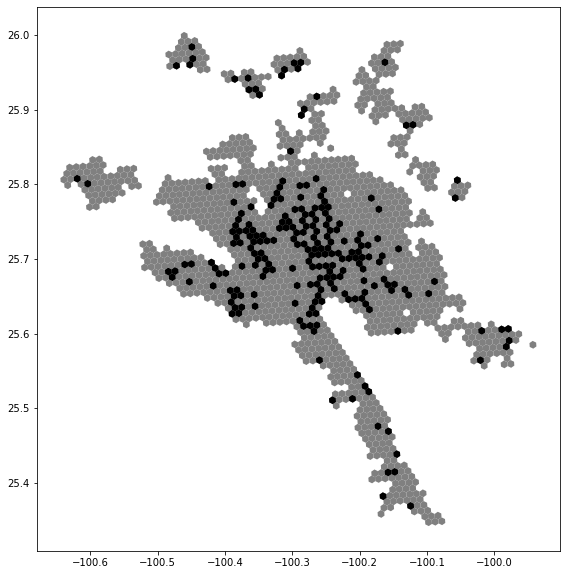

In [99]:
fig, ax = plt.subplots(figsize=(20,10))
hex_analysis.loc[(hex_analysis.T_Viv_10_20>0)&
                (hex_analysis.T_Pob_10_20<0),'loss_relation'] = (hex_analysis.T_Pob_10_20*-1) + (round(hex_analysis['prom_ocup'].mean(),2) * (hex_analysis.T_Viv_10_20*(hex_analysis.tvivparhab/hex_analysis.vivtot)))

hex_analysis.loc[(hex_analysis.T_Viv_10_20>0)&
                (hex_analysis.T_Pob_10_20<0),'log_loss_relation'] = np.log(hex_analysis.loc[(hex_analysis.T_Viv_10_20>0)&
                                                                                            (hex_analysis.T_Pob_10_20<0),'loss_relation'])

hex_analysis.loc[(hex_analysis.T_Viv_10_20>0)&
                (hex_analysis.T_Pob_10_20<0)].plot(color='black', ax=ax)

gdf.plot(ax=ax, color='grey', zorder=-1)

grl_dir = '/workspaces/accesibilidad-urbana/output/figures/viv_change/'
plt.savefig(grl_dir+f'{city}_PerdidaOportunidad.svg')

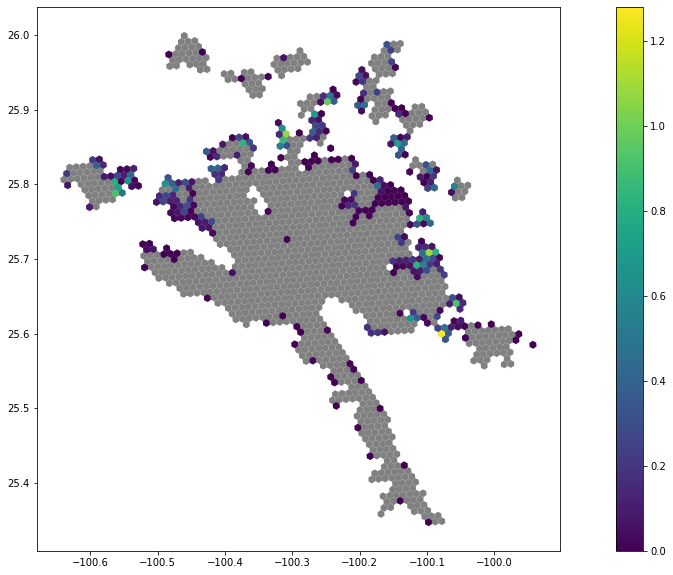

In [100]:
fig, ax = plt.subplots(figsize=(20,10))

hex_analysis.loc[hex_analysis['10_vivtot']==0,'pct_viv_nueva'] = round(100*(hex_analysis['T_Viv_10_20'] / hex_analysis['T_Viv_10_20'].sum()),2)

hex_analysis[hex_analysis['10_vivtot']==0].plot('pct_viv_nueva', legend=True, ax=ax) #### COMPARTIR

gdf.plot(ax=ax, color='grey', zorder=-1)

grl_dir = '/workspaces/accesibilidad-urbana/output/figures/viv_change/'
plt.savefig(grl_dir+f'{city}_VivNueva_sinViv2010.svg')

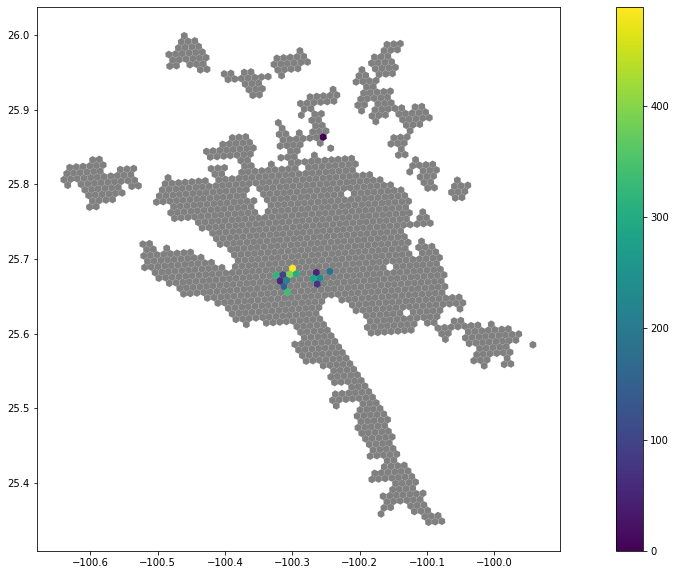

In [101]:
fig, ax = plt.subplots(figsize=(20,10))

hex_analysis[hex_analysis['15_min_analysis']<=15].plot('vivpar_des', legend=True, ax=ax) #### COMPARTIR

gdf.plot(ax=ax, color='grey', zorder=-1)

grl_dir = '/workspaces/accesibilidad-urbana/output/figures/viv_change/'
plt.savefig(grl_dir+f'{city}_ViviendaDeshabitada_Poligono15min.svg')

## Zona 20 minutos AGEB

In [102]:
df = pd.read_json("../../scripts/Metropolis_CVE.json")
c = city

In [148]:
year = 2010

#Folder names from database
ageb_schema = 'censoageb'
ageb_folder = f'censoageb_{year}'


# Creates empty GeoDataFrame to store block locations
ageb_censo = gpd.GeoDataFrame()
# Iterates over municipality codes for each metropolitan area or capital
for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM {ageb_schema}.{ageb_folder} WHERE \"cve_geo\" LIKE \'{m}%%\'"
    ageb_censo = ageb_censo.append(aup.gdf_from_query(query, geometry_col='geometry'))

ageb_censo = ageb_censo.to_crs("EPSG:4326")
print(ageb_censo.shape)
ageb_censo.head(2)

(1772, 206)


,codigo,cve_geo,geog,fecha_act,geom,institut,OID,geometry,censo,cve_ent,...,vph_snbien,vph_radio,vph_tv,vph_refri,vph_lavad,vph_autom,vph_pc,vph_telef,vph_cel,vph_inter
0,LA_6052,1900100010021,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,32532,"POLYGON ((-100.39362 25.94910, -100.39380 25.9...",2010,19,...,NaN,245.0,295.0,285.0,260.0,168.0,80.0,63.0,246.0,42.0
1,LA_6052,1900100010040,ÁREA GEOESTADÍSTICA BÁSICA,12/2007,ÁREA,INEGI,32533,"POLYGON ((-100.38485 25.94275, -100.38493 25.9...",2010,19,...,0.0,18.0,19.0,17.0,15.0,10.0,NaN,NaN,17.0,0.0


In [104]:
prom_ocup_tot_10 = ageb_censo.prom_ocup.mean()
prom_ocup_tot_10

3.632832957110609

In [149]:
viv_des_tot_10 = ageb_censo.vivpar_des.sum()
viv_des_tot_10

192906.0

In [105]:
ageb_clip = gpd.clip(ageb_censo[['cve_geo','geometry']], hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite,['hex_id_8','geometry']])
ageb_clip = ageb_clip.to_crs("EPSG:32613")
ageb_clip['area_ha_clip'] = ageb_clip.area / 10000
ageb_clip = ageb_clip.groupby('cve_geo').sum()
ageb_analysis = pd.merge(ageb_censo[['cve_geo','geometry']], ageb_clip.reset_index(), on='cve_geo')
ageb_analysis = ageb_analysis.to_crs("EPSG:32613")
ageb_analysis['area_ha_ageb'] = ageb_analysis.area / 10000
ageb_analysis['clip_pct'] = (ageb_analysis['area_ha_clip'] / ageb_analysis['area_ha_ageb'])
cvgeo_unique = list(ageb_analysis.loc[ageb_analysis.clip_pct>=0.5].cve_geo.unique())

In [106]:
pobtot_10 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].pobtot.sum()
pobtot_10

58368

In [107]:
prom_ocup_10 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].prom_ocup.mean()
prom_ocup_10

3.1118181818181823

In [108]:
vivpar_des_10 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].vivpar_des.sum()
vivpar_des_10

4132.0

In [109]:
vivtot_10 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].vivtot.sum()
vivtot_10

22245

In [110]:
tvivparhab_10 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].tvivparhab.sum()
tvivparhab_10

17457.0

In [111]:
tvivpar_10 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].tvivpar.sum()
tvivpar_10

21885.0

<AxesSubplot:>

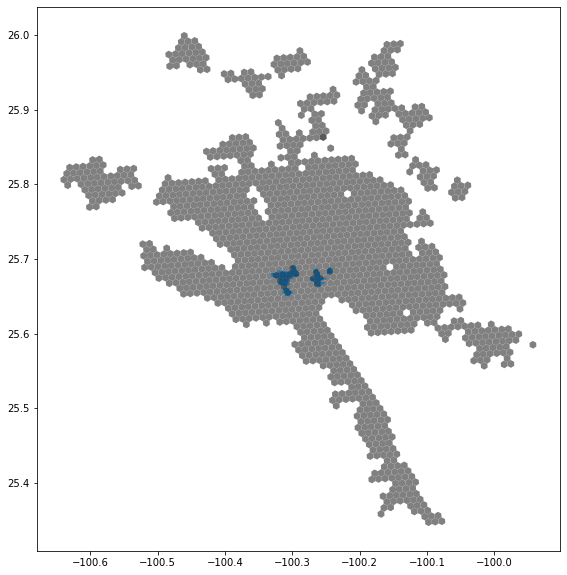

In [112]:
fig, ax = plt.subplots(figsize=(20,10))


ageb_analysis.loc[ageb_analysis.clip_pct>=0.5].to_crs("EPSG:4326").plot(ax=ax)
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].plot(zorder=2, alpha=0.3, color='black',ax=ax)
hex_analysis.plot(zorder=-1, color='grey',ax=ax)

In [145]:
year = 2020

#Folder names from database
ageb_schema = 'censoageb'
ageb_folder = f'censoageb_{year}'


# Creates empty GeoDataFrame to store block locations
ageb_censo = gpd.GeoDataFrame()
# Iterates over municipality codes for each metropolitan area or capital
for i in range(len(df.loc["mpos", c])):
    # Extracts specific municipality code
    m = df.loc["mpos", c][i]
    # Downloads municipality polygon according to code
    query = f"SELECT * FROM {ageb_schema}.{ageb_folder} WHERE \"cve_geo\" LIKE \'{m}%%\'"
    ageb_censo = ageb_censo.append(aup.gdf_from_query(query, geometry_col='geometry'))

ageb_censo = ageb_censo.to_crs("EPSG:4326")
print(ageb_censo.shape)
ageb_censo.head(2)

(2185, 237)


,cve_geo,cve_ent,cve_mun,cve_loc,cve_ageb,geometry,entidad,nom_ent,mun,nom_mun,...,vph_cel,vph_inter,vph_stvp,vph_spmvpi,vph_cvj,vph_sinrtv,vph_sintlc,vph_sincint,vph_sintic,cve_geo_ageb
0,1900100010021,19,001,0001,0021,"POLYGON ((-100.39903 25.95023, -100.39815 25.9...",19,Nuevo León,1,Abasolo,...,284.0,160.0,141.0,62.0,54.0,4.0,17.0,133.0,NaN,1900100010021
1,1900100010036,19,001,0001,0036,"POLYGON ((-100.39383 25.94483, -100.39363 25.9...",19,Nuevo León,1,Abasolo,...,198.0,93.0,110.0,36.0,29.0,5.0,14.0,109.0,3.0,1900100010036


In [114]:
prom_ocup_tot_20 = ageb_censo.prom_ocup.mean()
prom_ocup_tot_20

3.3505445316105216

In [147]:
viv_des_tot_20 = ageb_censo.vivpar_des.sum()
viv_des_tot_20

237948.0

In [115]:
ageb_clip = gpd.clip(ageb_censo[['cve_geo','geometry']], hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite,['hex_id_8','geometry']])
ageb_clip = ageb_clip.to_crs("EPSG:32613")
ageb_clip['area_ha_clip'] = ageb_clip.area / 10000
ageb_clip = ageb_clip.groupby('cve_geo').sum()
ageb_analysis = pd.merge(ageb_censo[['cve_geo','geometry']], ageb_clip.reset_index(), on='cve_geo')
ageb_analysis = ageb_analysis.to_crs("EPSG:32613")
ageb_analysis['area_ha_ageb'] = ageb_analysis.area / 10000
ageb_analysis['clip_pct'] = (ageb_analysis['area_ha_clip'] / ageb_analysis['area_ha_ageb'])
cvgeo_unique = list(ageb_analysis.loc[ageb_analysis.clip_pct>=0.5].cve_geo.unique())

In [116]:
pobtot_20 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].pobtot.sum()
pobtot_20

52408

In [117]:
prom_ocup_20 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].prom_ocup.mean()
prom_ocup_20

2.84

In [118]:
vivpar_des_20 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].vivpar_des.sum()
vivpar_des_20

3473.0

In [119]:
vivtot_20 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].vivtot.sum()
vivtot_20

21314

In [120]:
tvivparhab_20 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].tvivparhab.sum()
tvivparhab_20

17326.0

In [121]:
tvivpar_20 = ageb_censo[ageb_censo['cve_geo'].isin(cvgeo_unique)].tvivpar.sum()
tvivpar_20

19550.0

<AxesSubplot:>

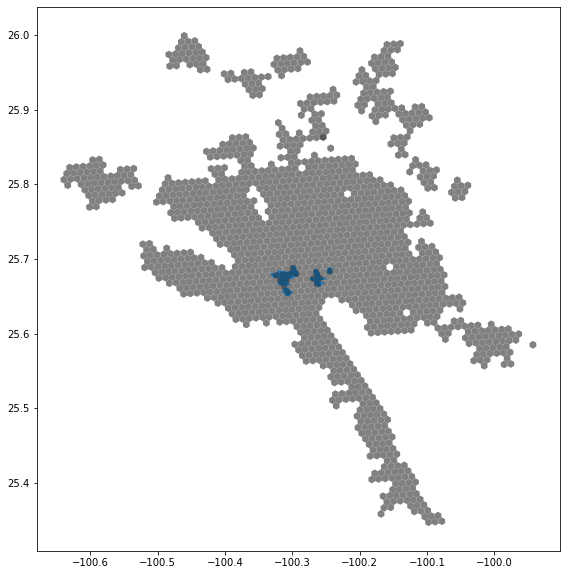

In [122]:
fig, ax = plt.subplots(figsize=(20,10))


ageb_analysis.loc[ageb_analysis.clip_pct>=0.5].to_crs("EPSG:4326").plot(ax=ax)
hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].plot(zorder=2, alpha=0.3, color='black',ax=ax)
hex_analysis.plot(zorder=-1, color='grey',ax=ax)

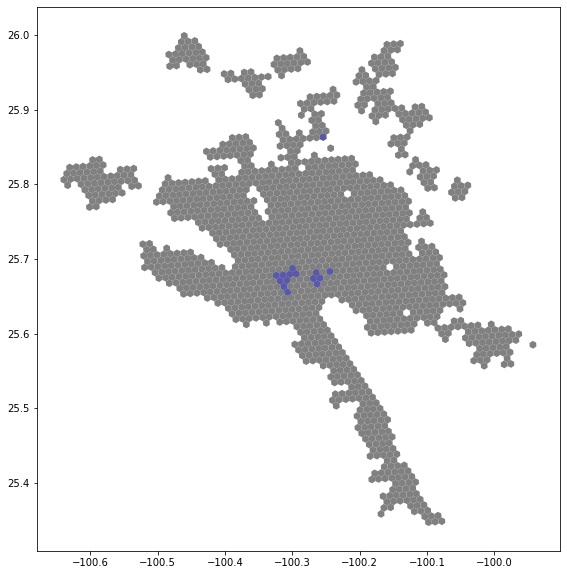

In [123]:
fig, ax = plt.subplots(figsize=(20,10))


hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].dissolve().plot(zorder=2, alpha=0.3, color='blue',ax=ax)
hex_analysis.plot(zorder=-1, color='grey',ax=ax)

grl_dir = '/workspaces/accesibilidad-urbana/output/figures/viv_change/'
plt.savefig(grl_dir+f'{city}_Poligono_{tiempo_limite}min.svg')

In [124]:
vivtot_20 - vivtot_10 # vivienda total

-931

In [125]:
vivpar_des_20 / vivtot_20

0.16294454349254012

In [126]:
vivpar_des_20 - vivpar_des_10 # vivienda deshabitada

-659.0

In [127]:
(vivpar_des_20 - vivpar_des_10)/vivpar_des_10 # vivienda deshabitada

-0.15948693126815103

In [128]:
tvivparhab_20 - tvivparhab_10 # viviendas particulares habitadas

-131.0

In [129]:
tvivpar_20 - tvivpar_10 # total de viviendas particulares

-2335.0

In [130]:
vivpar_des_20 / tvivpar_20 # vivpar_des / tvivpar 2020

0.1776470588235294

In [131]:
vivpar_des_20 / vivtot_20 # vivpar_des / vivtot 2020

0.16294454349254012

In [132]:
tvivparhab_20 / tvivpar_20 # tvivparhab / tvivpar 2020

0.8862404092071611

In [133]:
vivpar_des_10 / tvivpar_10 # vivpar_des / tvivpar 2010

0.18880511766049807

In [134]:
vivpar_des_10 / vivtot_10 # vivpar_des / vivtot 2010

0.1857496066531805

In [135]:
tvivparhab_10 / tvivpar_10 # tvivparhab / tvivpar 2010

0.7976696367374915

In [136]:
(vivtot_20 - vivtot_10)/vivtot_10 # vivienda total

-0.04185210159586424

In [137]:
prom_ocup_20 - prom_ocup_10 # promedio de ocupantes 2010 vs 2020

-0.2718181818181824

In [138]:
tvivparhab_10 * -0.4882450076804914

-8523.293099078339

In [139]:
pobtot_20 - pobtot_10 # poblacion total

-5960

In [140]:
-287628.5517396312 + 141513

-146115.55173963122

In [141]:
(-287628.5517396312+141513) / (tvivparhab_20 - tvivparhab_10)

1115.385891142223

In [142]:
prom_ocup_20 * vivpar_des_20

9863.32

In [143]:
datos_estadisticos = {
    'viv_tot_2010' : hex_analysis['10_vivtot'].sum(),
    'viv_tot_2020' : hex_analysis['vivtot'].sum(),
    'cambio_vivtot_10_20' : hex_analysis['T_Viv_10_20'].sum(),
    '%_viv_nueva_10_20' : round(100 * hex_analysis['T_Viv_10_20'].sum() / hex_analysis['10_vivtot'].sum(),2),
    'pob_tot_2010' : hex_analysis['10_pobtot'].sum(),
    'pob_tot_2020' : hex_analysis['pobtot'].sum(),
    'cambio_pobtot_10_20' : hex_analysis['T_Pob_10_20'].sum(),
    '%_pob_nueva_10_20' : round(100*hex_analysis['T_Pob_10_20'].sum() / hex_analysis['10_pobtot'].sum(),2),
    'pob_nueva-viv_nueva' : round(hex_analysis['T_Pob_10_20'].sum() / hex_analysis['T_Viv_10_20'].sum(),2),
    'prom_ocup_10' : prom_ocup_tot_10,
    'prom_ocup_20' : prom_ocup_tot_20,
    'viv20_sin_viv10' : gdf[gdf['10_vivtot']==0]['vivtot'].sum(),
    '%viv20_sinviv10_cambio_vivtot_10_20' : round(100*gdf[gdf['10_vivtot']==0]['vivtot'].sum() / hex_analysis['T_Viv_10_20'].sum(),2),
    'pob20_sin_viv10' : gdf[gdf['10_vivtot']==0]['pobtot'].sum(),
    '%pob20_sinviv10_cambio_pobtot_10_20' : round(100*gdf[gdf['10_vivtot']==0]['pobtot'].sum() / hex_analysis['T_Pob_10_20'].sum(),2),
    f'cambio_pobtot_10_20_zona_{tiempo_limite}_min' : hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Pob_10_20.sum(),
    f'cambio_vivtot_10_20_zona_{tiempo_limite}_min' : hex_analysis.loc[hex_analysis['15_min_analysis']<=tiempo_limite].T_Viv_10_20.sum(),
    f'prom_ocup_20_zona_{tiempo_limite}_min' : prom_ocup_20,
    f'prom_ocup_20_zona_>{tiempo_limite}_min' : prom_ocup_10,
    f'vivienda_deshab_zona_{tiempo_limite}_min' : vivpar_des_20,
    f'vivienda_deshab_zona_>{tiempo_limite}_min' : vivpar_des_10,
    f'cambio_pobtot_10_20_zona_>{tiempo_limite}_min' : hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].T_Pob_10_20.sum(),
    f'cambio_vivtot_10_20_zona_>{tiempo_limite}_min' : hex_analysis.loc[hex_analysis['15_min_analysis']>tiempo_limite].T_Viv_10_20.sum(),
    f'ocupacion_total_zona_{tiempo_limite}_min' : prom_ocup_20 * vivpar_des_20,
    f'perdida_pob_viv_nueva' : perd_pob_viv_nueva,
    f'viv_nueva_perdida_pob' : viv_nueva_perd_pob,
}

In [144]:
df_est = pd.DataFrame.from_dict(datos_estadisticos, orient='index').reset_index().rename(columns={'index':'Variables',
                                                                                        0:'Valores'})

grl_dir = '/workspaces/accesibilidad-urbana/output/data/viv_change/'
df_est.to_csv(grl_dir + f'{city}_Estadisticos_Cambio_Vivienda.csv')